# Loan Default Prediction - Part 12 - Nearest Neighbor Classifiers

This is an exploratory project for me to apply what I have learned in the Data Science and Machine Learning courses that I took this year. The data is from a Kaggle competition [Loan Default Prediction](https://www.kaggle.com/c/loan-default-prediction). 

This is Part 12 of the project: Nearest Neighbor Classifiers.

In this part, I will move on from decision-tree based models and switch to a new type, Nearest Neighbor Classifiers. This type of classifiers use the labels of nearest neighbors of a data point to determine its label. 

I will first load the data.

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import time
import project_utils as utils

In [2]:
# Load the training data (imputed but not normalized) from the CSV file

df, X, y = utils.load_csv('train_v2_preprocessed.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105471 entries, 0 to 105470
Columns: 1789 entries, f1_0 to loss
dtypes: float64(1789)
memory usage: 1.4 GB


In [3]:
# Separate training and validation sets

from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
X_train, y_train, X_valid, y_valid = utils.split_data(kf, X, y)

## K-Nearest Neighbors

I will first train a KNN model with default settings using the [sklearn.neighbors.KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). The default __k__=5.

In [4]:
n_jobs = 4

Time elapsed (Training): 24.3731 s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=5, p=2,
           weights='uniform')
Accuracy (Training): 0.908493
ROCAUC Score (Training): 0.875939
PRAUC Score (Training): 0.173115
Accuracy (Validation): 0.906708
ROCAUC Score (Validation): 0.524212
PRAUC Score (Validation): 0.011108
Time elapsed (Evaluation): 83.3362 s


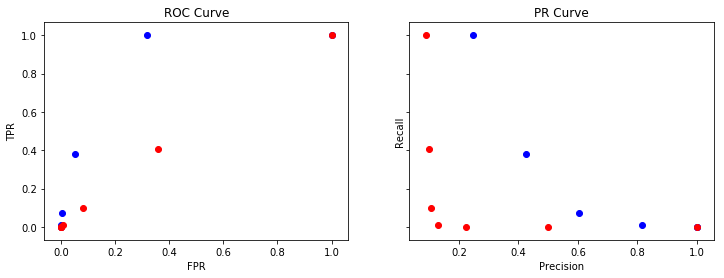

In [5]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_jobs=n_jobs)
fit_time = utils.train_model(clf, X_train, y_train)
acc_score, rocauc_score, prauc_score, eval_time = utils.evaluate(clf, X_train, y_train, X_valid, y_valid)

## Sweeping K

I will try a set of different __k__s to see the effects.

In [6]:
ks = [1, 2, 3, 4, 5, 6, 8, 10, 12, 15, 20, 25, 30, 50, 80, 100]

----- k = 1 -----
Time elapsed (Training): 25.2231 s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=1, p=2,
           weights='uniform')
Accuracy (Training): 1.000000
ROCAUC Score (Training): 1.000000
PRAUC Score (Training): 0.000000
Accuracy (Validation): 0.839915
ROCAUC Score (Validation): 0.509374
PRAUC Score (Validation): 0.057553
Time elapsed (Evaluation): 35.0431 s


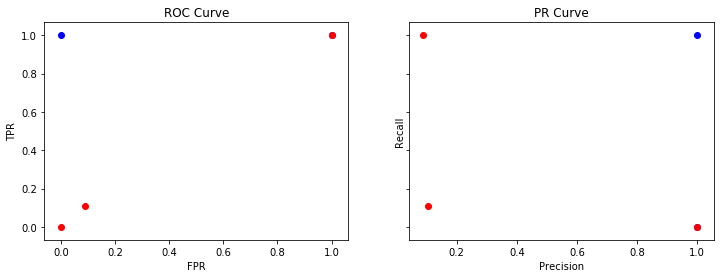

----- k = 2 -----
Time elapsed (Training): 24.6083 s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=2, p=2,
           weights='uniform')
Accuracy (Training): 0.917050
ROCAUC Score (Training): 0.959513
PRAUC Score (Training): 0.234680
Accuracy (Validation): 0.905475
ROCAUC Score (Validation): 0.516007
PRAUC Score (Validation): 0.094045
Time elapsed (Evaluation): 68.9723 s


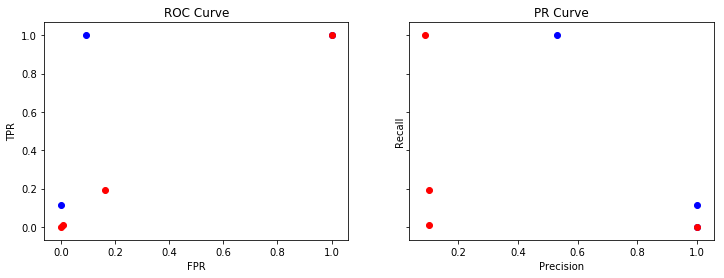

----- k = 3 -----
Time elapsed (Training): 25.3550 s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=3, p=2,
           weights='uniform')
Accuracy (Training): 0.917429
ROCAUC Score (Training): 0.926119
PRAUC Score (Training): 0.228857
Accuracy (Validation): 0.892534
ROCAUC Score (Validation): 0.516083
PRAUC Score (Validation): 0.015701
Time elapsed (Evaluation): 75.3238 s


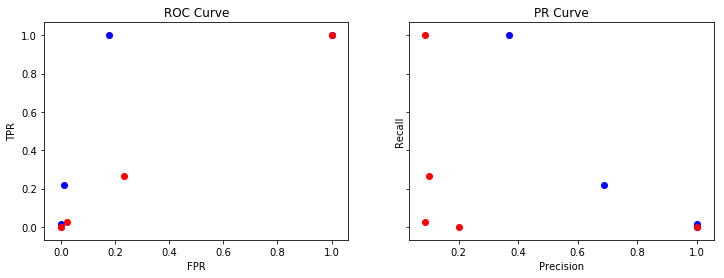

----- k = 4 -----
Time elapsed (Training): 25.1894 s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=4, p=2,
           weights='uniform')
Accuracy (Training): 0.908706
ROCAUC Score (Training): 0.898577
PRAUC Score (Training): 0.194920
Accuracy (Validation): 0.909836
ROCAUC Score (Validation): 0.518019
PRAUC Score (Validation): 0.015585
Time elapsed (Evaluation): 80.0926 s


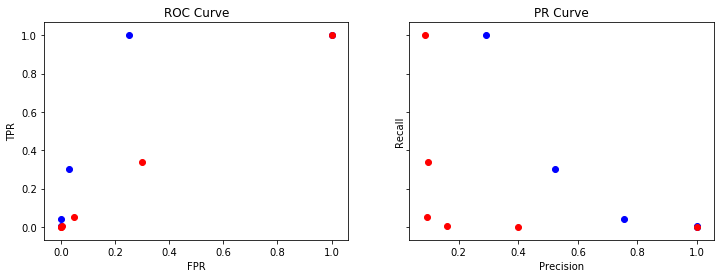

----- k = 5 -----
Time elapsed (Training): 26.0770 s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=5, p=2,
           weights='uniform')
Accuracy (Training): 0.908493
ROCAUC Score (Training): 0.875939
PRAUC Score (Training): 0.173115
Accuracy (Validation): 0.906708
ROCAUC Score (Validation): 0.524212
PRAUC Score (Validation): 0.011108
Time elapsed (Evaluation): 82.4531 s


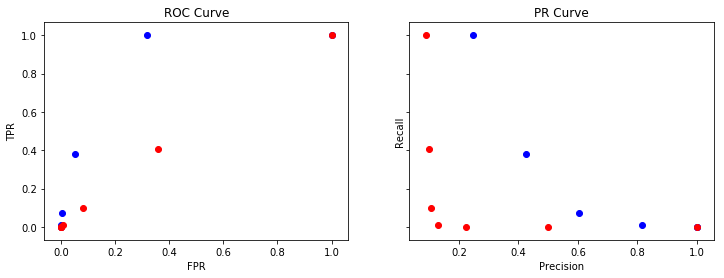

----- k = 6 -----
Time elapsed (Training): 24.2008 s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=6, p=2,
           weights='uniform')
Accuracy (Training): 0.907011
ROCAUC Score (Training): 0.857078
PRAUC Score (Training): 0.161348
Accuracy (Validation): 0.911259
ROCAUC Score (Validation): 0.533042
PRAUC Score (Validation): 0.010697
Time elapsed (Evaluation): 84.8430 s


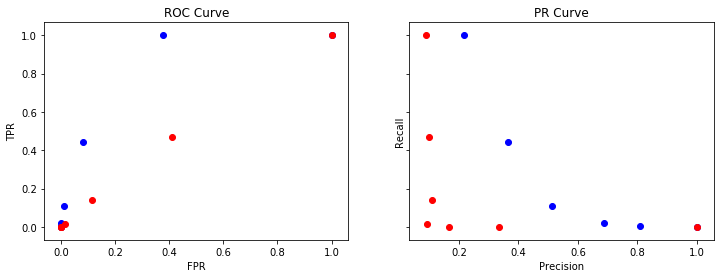

----- k = 8 -----
Time elapsed (Training): 22.9538 s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=8, p=2,
           weights='uniform')
Accuracy (Training): 0.906514
ROCAUC Score (Training): 0.825563
PRAUC Score (Training): 0.146401
Accuracy (Validation): 0.911448
ROCAUC Score (Validation): 0.530948
PRAUC Score (Validation): 0.016379
Time elapsed (Evaluation): 89.1664 s


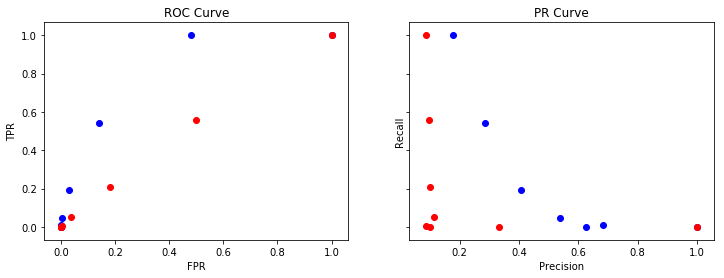

----- k = 10 -----
Time elapsed (Training): 24.4459 s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=10, p=2,
           weights='uniform')
Accuracy (Training): 0.906206
ROCAUC Score (Training): 0.801248
PRAUC Score (Training): 0.133943
Accuracy (Validation): 0.911733
ROCAUC Score (Validation): 0.532123
PRAUC Score (Validation): 0.012075
Time elapsed (Evaluation): 92.8590 s


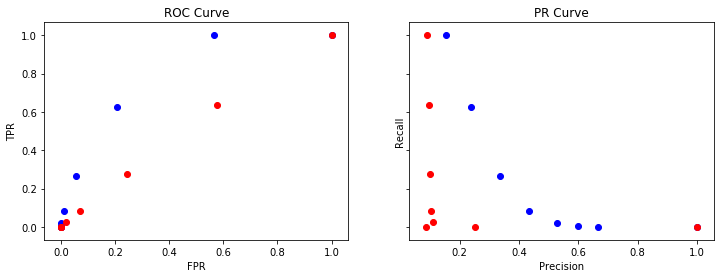

----- k = 12 -----
Time elapsed (Training): 23.4012 s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=12, p=2,
           weights='uniform')
Accuracy (Training): 0.906170
ROCAUC Score (Training): 0.783341
PRAUC Score (Training): 0.124028
Accuracy (Validation): 0.911733
ROCAUC Score (Validation): 0.530676
PRAUC Score (Validation): 0.056535
Time elapsed (Evaluation): 95.5932 s


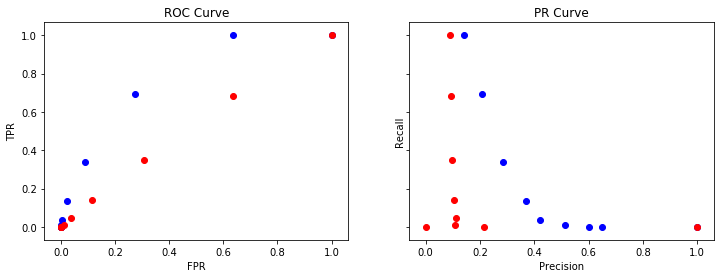

----- k = 15 -----
Time elapsed (Training): 24.9383 s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=15, p=2,
           weights='uniform')
Accuracy (Training): 0.906063
ROCAUC Score (Training): 0.761831
PRAUC Score (Training): 0.115013
Accuracy (Validation): 0.911827
ROCAUC Score (Validation): 0.529518
PRAUC Score (Validation): 0.018431
Time elapsed (Evaluation): 99.4722 s


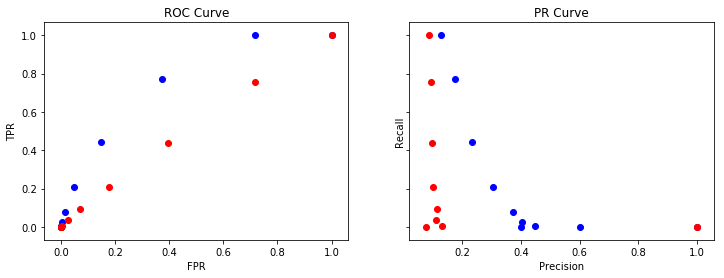

----- k = 20 -----
Time elapsed (Training): 25.0728 s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=20, p=2,
           weights='uniform')
Accuracy (Training): 0.906099
ROCAUC Score (Training): 0.735804
PRAUC Score (Training): 0.101692
Accuracy (Validation): 0.911827
ROCAUC Score (Validation): 0.532019
PRAUC Score (Validation): 0.010600
Time elapsed (Evaluation): 105.5456 s


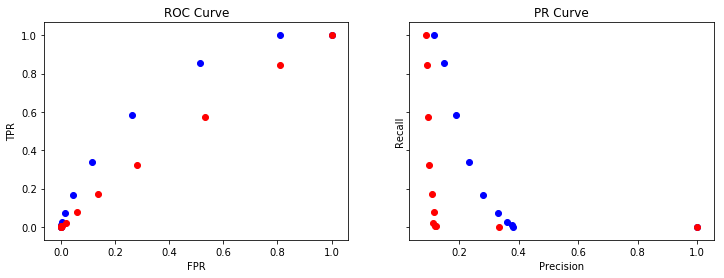

----- k = 25 -----
Time elapsed (Training): 25.1607 s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=25, p=2,
           weights='uniform')
Accuracy (Training): 0.906099
ROCAUC Score (Training): 0.716982
PRAUC Score (Training): 0.096768
Accuracy (Validation): 0.911827
ROCAUC Score (Validation): 0.530062
PRAUC Score (Validation): 0.053909
Time elapsed (Evaluation): 110.4214 s


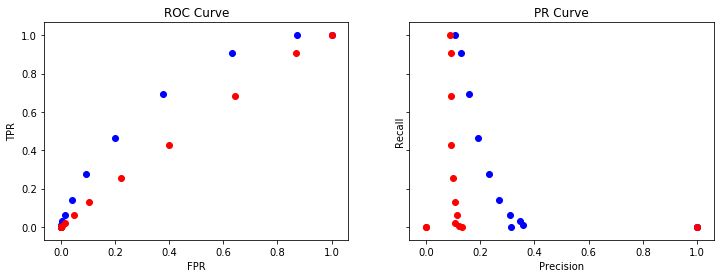

----- k = 30 -----
Time elapsed (Training): 24.6425 s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=30, p=2,
           weights='uniform')
Accuracy (Training): 0.906099
ROCAUC Score (Training): 0.701791
PRAUC Score (Training): 0.087072
Accuracy (Validation): 0.911827
ROCAUC Score (Validation): 0.529198
PRAUC Score (Validation): 0.025194
Time elapsed (Evaluation): 115.2113 s


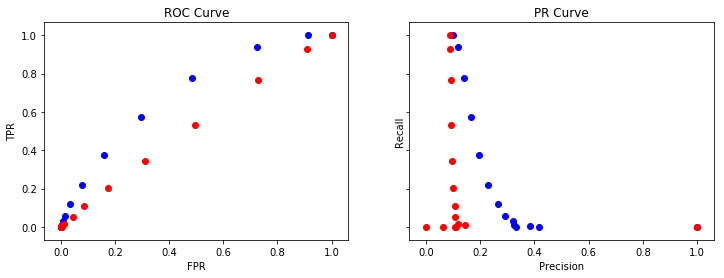

----- k = 50 -----
Time elapsed (Training): 25.8630 s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=50, p=2,
           weights='uniform')
Accuracy (Training): 0.906099
ROCAUC Score (Training): 0.669954
PRAUC Score (Training): 0.073033
Accuracy (Validation): 0.911827
ROCAUC Score (Validation): 0.540937
PRAUC Score (Validation): 0.019583
Time elapsed (Evaluation): 132.5602 s


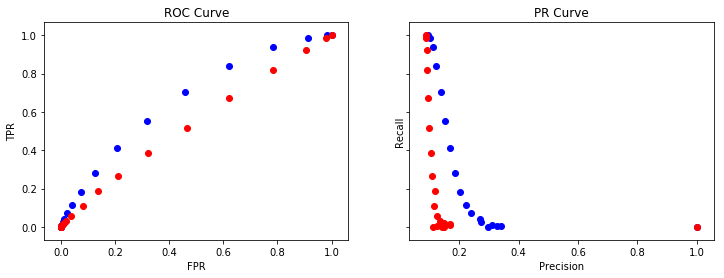

----- k = 80 -----
Time elapsed (Training): 23.7122 s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=80, p=2,
           weights='uniform')
Accuracy (Training): 0.906099
ROCAUC Score (Training): 0.645523
PRAUC Score (Training): 0.107307
Accuracy (Validation): 0.911827
ROCAUC Score (Validation): 0.547647
PRAUC Score (Validation): 0.060982
Time elapsed (Evaluation): 151.1388 s


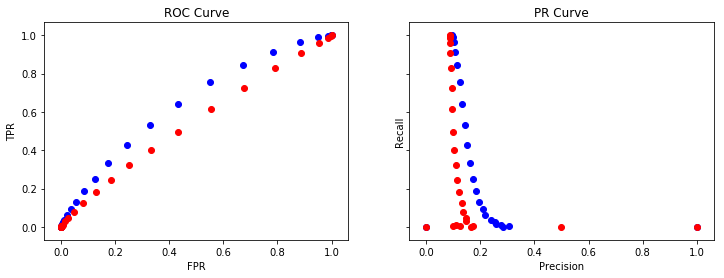

----- k = 100 -----
Time elapsed (Training): 25.2394 s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=100, p=2,
           weights='uniform')
Accuracy (Training): 0.906099
ROCAUC Score (Training): 0.636321
PRAUC Score (Training): 0.054556
Accuracy (Validation): 0.911827
ROCAUC Score (Validation): 0.547408
PRAUC Score (Validation): 0.032964
Time elapsed (Evaluation): 163.9258 s


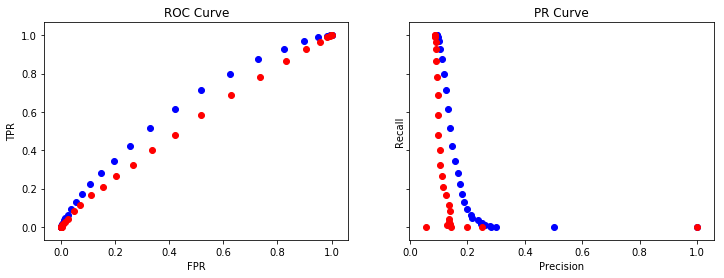

In [7]:
fit_times = []; eval_times = []; acc_scores = []; rocauc_scores = []; prauc_scores = []

for k in ks:
    print('----- k = %d -----' % k)
    clf = neighbors.KNeighborsClassifier(n_jobs=n_jobs, n_neighbors=k)
    fit_time = utils.train_model(clf, X_train, y_train)
    acc_score, rocauc_score, prauc_score, eval_time = utils.evaluate(clf, X_train, y_train, X_valid, y_valid)
    fit_times.append(fit_time); eval_times.append(eval_time)
    acc_scores.append(acc_score); rocauc_scores.append(rocauc_score); prauc_scores.append(prauc_score)

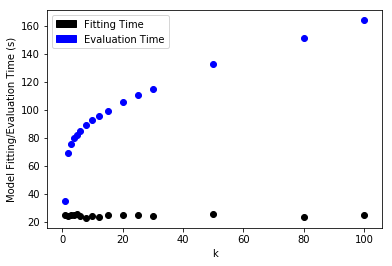

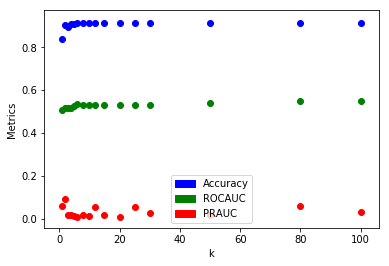

    0_k  1_Accuracy  2_ROCAUC   3_PRAUC  4_fit_time  5_eval_time
0     1    0.839915  0.509374  0.057553   25.223110    35.043085
1     2    0.905475  0.516007  0.094045   24.608323    68.972260
2     3    0.892534  0.516083  0.015701   25.355047    75.323831
3     4    0.909836  0.518019  0.015585   25.189357    80.092630
4     5    0.906708  0.524212  0.011108   26.077040    82.453081
5     6    0.911259  0.533042  0.010697   24.200791    84.842952
6     8    0.911448  0.530948  0.016379   22.953828    89.166424
7    10    0.911733  0.532123  0.012075   24.445860    92.858972
8    12    0.911733  0.530676  0.056535   23.401212    95.593172
9    15    0.911827  0.529518  0.018431   24.938304    99.472187
10   20    0.911827  0.532019  0.010600   25.072783   105.545612
11   25    0.911827  0.530062  0.053909   25.160710   110.421392
12   30    0.911827  0.529198  0.025194   24.642532   115.211288
13   50    0.911827  0.540937  0.019583   25.862950   132.560189
14   80    0.911827  0.54

In [8]:
utils.plot_metrics(ks, 'k', False, fit_times, eval_times, acc_scores, rocauc_scores, prauc_scores)

We can see that the evaluation time (instead of fitting time) increases as __k__ grows, as the evaluation needs to take __k__ examples into the computation. ROCAUC gradually increases to around 0.547 as __k__ increase to 80 and 100, meaning that considering a bigger number of neighbors is better.

## L1 Norm

Next, I will try using the L1 norm distance instead of the default L2 to compute the nearest neighbors. I will also try the same set of __k__s.

----- k = 1 -----
Time elapsed (Training): 23.1847 s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=1, p=1,
           weights='uniform')
Accuracy (Training): 1.000000
ROCAUC Score (Training): 1.000000
PRAUC Score (Training): 0.000000
Accuracy (Validation): 0.838540
ROCAUC Score (Validation): 0.508377
PRAUC Score (Validation): 0.056324
Time elapsed (Evaluation): 27.1089 s


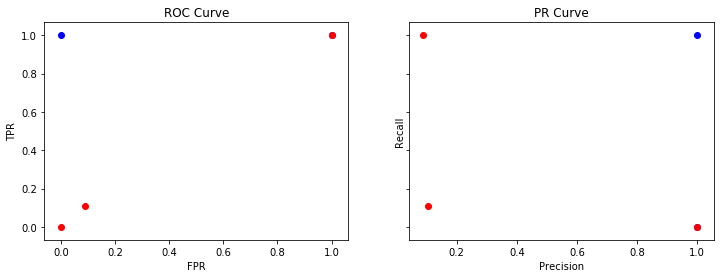

----- k = 2 -----
Time elapsed (Training): 24.6478 s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=2, p=1,
           weights='uniform')
Accuracy (Training): 0.917239
ROCAUC Score (Training): 0.959484
PRAUC Score (Training): 0.235052
Accuracy (Validation): 0.904859
ROCAUC Score (Validation): 0.513801
PRAUC Score (Validation): 0.096415
Time elapsed (Evaluation): 53.7715 s


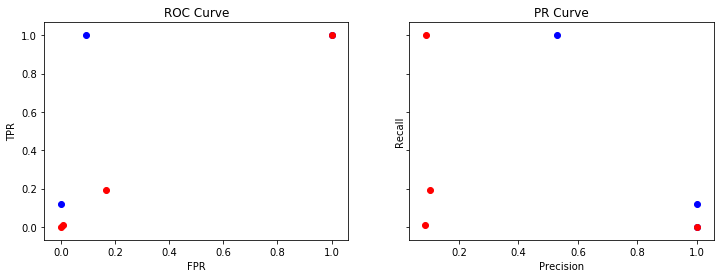

----- k = 3 -----
Time elapsed (Training): 23.8603 s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=3, p=1,
           weights='uniform')
Accuracy (Training): 0.917453
ROCAUC Score (Training): 0.926284
PRAUC Score (Training): 0.228450
Accuracy (Validation): 0.892676
ROCAUC Score (Validation): 0.525093
PRAUC Score (Validation): 0.140271
Time elapsed (Evaluation): 59.0438 s


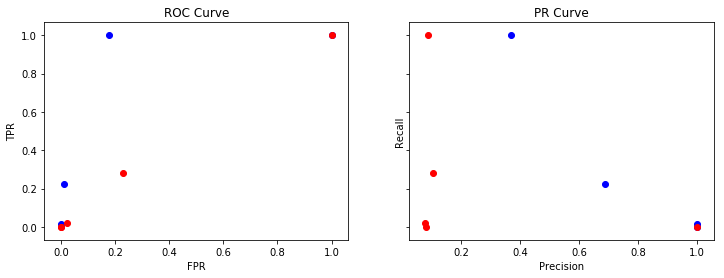

----- k = 4 -----
Time elapsed (Training): 23.4326 s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=4, p=1,
           weights='uniform')
Accuracy (Training): 0.908848
ROCAUC Score (Training): 0.899757
PRAUC Score (Training): 0.201610
Accuracy (Validation): 0.909362
ROCAUC Score (Validation): 0.525536
PRAUC Score (Validation): 0.205810
Time elapsed (Evaluation): 62.5833 s


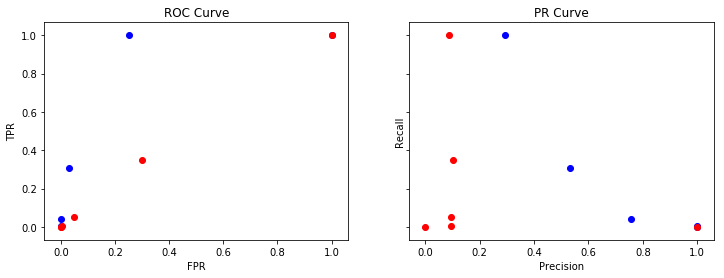

----- k = 5 -----
Time elapsed (Training): 25.1255 s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=5, p=1,
           weights='uniform')
Accuracy (Training): 0.908896
ROCAUC Score (Training): 0.876734
PRAUC Score (Training): 0.179668
Accuracy (Validation): 0.904764
ROCAUC Score (Validation): 0.525993
PRAUC Score (Validation): 0.094834
Time elapsed (Evaluation): 66.3906 s


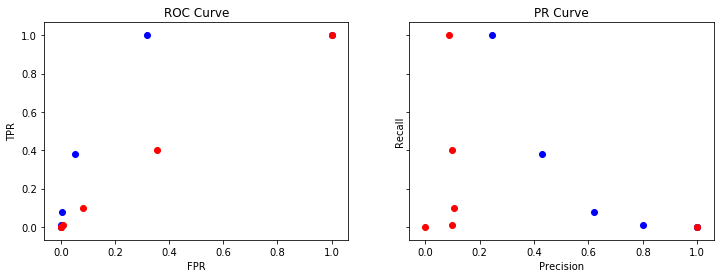

----- k = 6 -----
Time elapsed (Training): 24.8685 s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=6, p=1,
           weights='uniform')
Accuracy (Training): 0.907000
ROCAUC Score (Training): 0.857820
PRAUC Score (Training): 0.164834
Accuracy (Validation): 0.910879
ROCAUC Score (Validation): 0.531890
PRAUC Score (Validation): 0.054751
Time elapsed (Evaluation): 68.4220 s


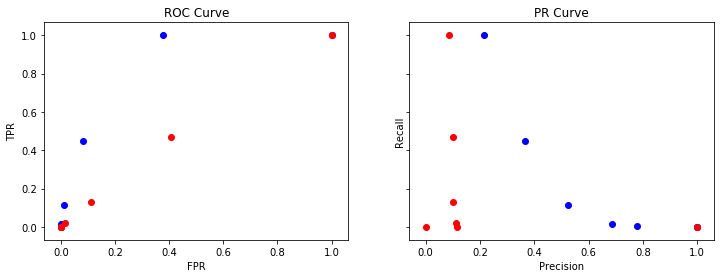

----- k = 8 -----
Time elapsed (Training): 23.0601 s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=8, p=1,
           weights='uniform')
Accuracy (Training): 0.906478
ROCAUC Score (Training): 0.826305
PRAUC Score (Training): 0.147922
Accuracy (Validation): 0.911306
ROCAUC Score (Validation): 0.531444
PRAUC Score (Validation): 0.050060
Time elapsed (Evaluation): 72.0557 s


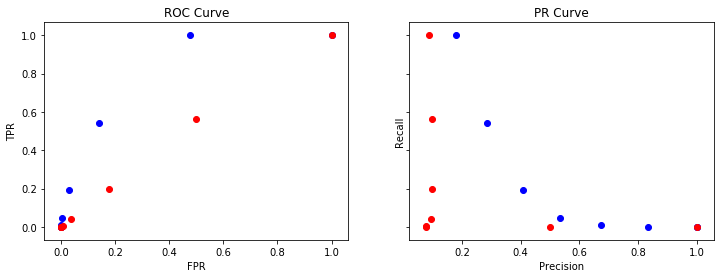

----- k = 10 -----
Time elapsed (Training): 24.5480 s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=10, p=1,
           weights='uniform')
Accuracy (Training): 0.906241
ROCAUC Score (Training): 0.802873
PRAUC Score (Training): 0.135676
Accuracy (Validation): 0.911780
ROCAUC Score (Validation): 0.529555
PRAUC Score (Validation): 0.015403
Time elapsed (Evaluation): 75.5009 s


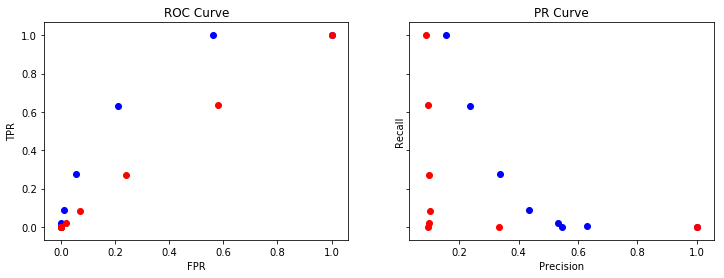

----- k = 12 -----
Time elapsed (Training): 23.3306 s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=12, p=1,
           weights='uniform')
Accuracy (Training): 0.906206
ROCAUC Score (Training): 0.785363
PRAUC Score (Training): 0.126368
Accuracy (Validation): 0.911827
ROCAUC Score (Validation): 0.533147
PRAUC Score (Validation): 0.011240
Time elapsed (Evaluation): 78.6085 s


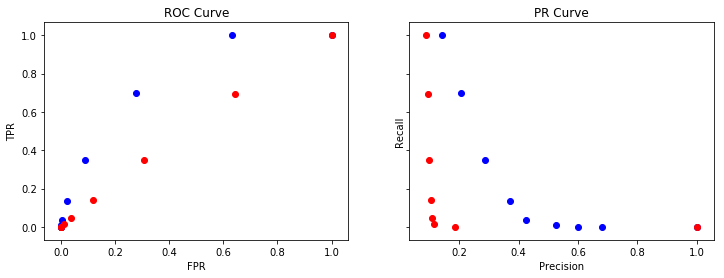

----- k = 15 -----
Time elapsed (Training): 24.6874 s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=15, p=1,
           weights='uniform')
Accuracy (Training): 0.906087
ROCAUC Score (Training): 0.764952
PRAUC Score (Training): 0.115866
Accuracy (Validation): 0.911780
ROCAUC Score (Validation): 0.528590
PRAUC Score (Validation): 0.055284
Time elapsed (Evaluation): 84.0462 s


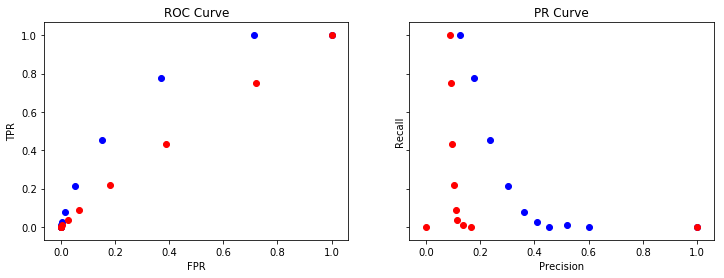

----- k = 20 -----
Time elapsed (Training): 24.7773 s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=20, p=1,
           weights='uniform')
Accuracy (Training): 0.906099
ROCAUC Score (Training): 0.739549
PRAUC Score (Training): 0.103823
Accuracy (Validation): 0.911827
ROCAUC Score (Validation): 0.530583
PRAUC Score (Validation): 0.052982
Time elapsed (Evaluation): 88.3776 s


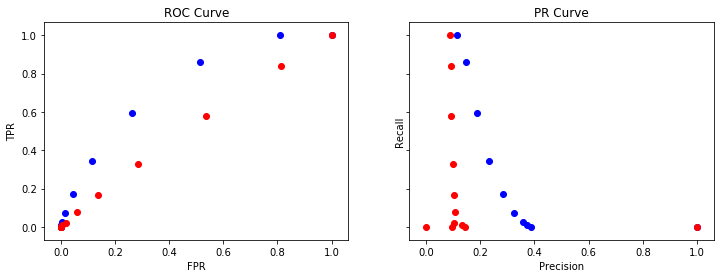

----- k = 25 -----
Time elapsed (Training): 25.0768 s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=25, p=1,
           weights='uniform')
Accuracy (Training): 0.906099
ROCAUC Score (Training): 0.721179
PRAUC Score (Training): 0.097289
Accuracy (Validation): 0.911827
ROCAUC Score (Validation): 0.534214
PRAUC Score (Validation): 0.054739
Time elapsed (Evaluation): 93.2818 s


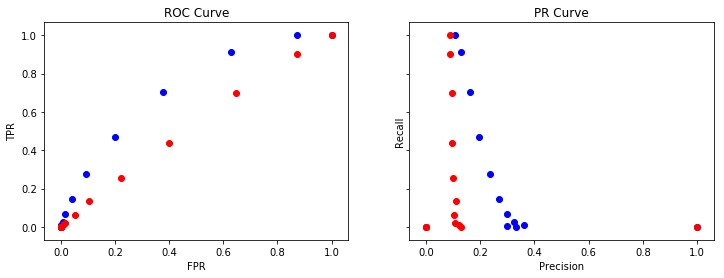

----- k = 30 -----
Time elapsed (Training): 23.8421 s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=30, p=1,
           weights='uniform')
Accuracy (Training): 0.906099
ROCAUC Score (Training): 0.705531
PRAUC Score (Training): 0.088709
Accuracy (Validation): 0.911827
ROCAUC Score (Validation): 0.535429
PRAUC Score (Validation): 0.015246
Time elapsed (Evaluation): 98.8328 s


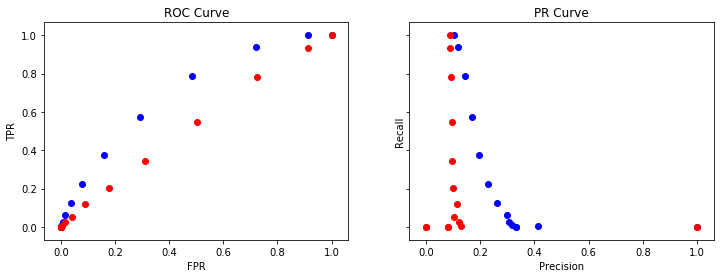

----- k = 50 -----
Time elapsed (Training): 24.9101 s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=50, p=1,
           weights='uniform')
Accuracy (Training): 0.906099
ROCAUC Score (Training): 0.672864
PRAUC Score (Training): 0.122581
Accuracy (Validation): 0.911827
ROCAUC Score (Validation): 0.544805
PRAUC Score (Validation): 0.063518
Time elapsed (Evaluation): 114.2470 s


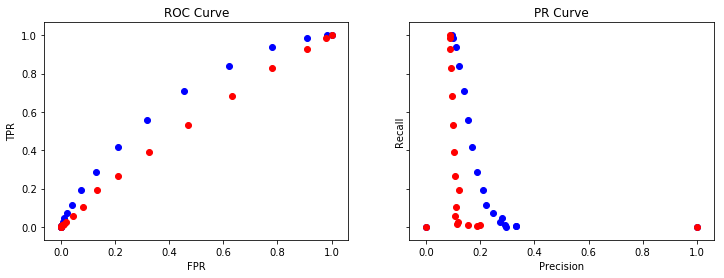

----- k = 80 -----
Time elapsed (Training): 22.9690 s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=80, p=1,
           weights='uniform')
Accuracy (Training): 0.906099
ROCAUC Score (Training): 0.647587
PRAUC Score (Training): 0.061302
Accuracy (Validation): 0.911827
ROCAUC Score (Validation): 0.549623
PRAUC Score (Validation): 0.016665
Time elapsed (Evaluation): 133.8132 s


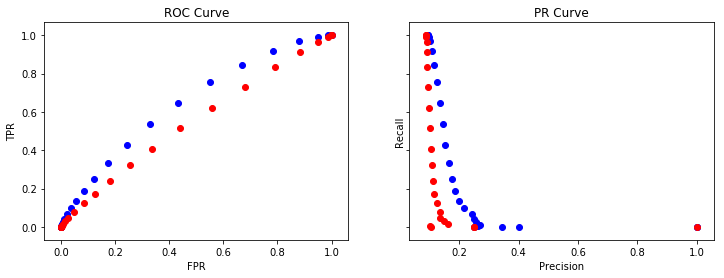

----- k = 100 -----
Time elapsed (Training): 25.1330 s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=100, p=1,
           weights='uniform')
Accuracy (Training): 0.906099
ROCAUC Score (Training): 0.638709
PRAUC Score (Training): 0.055246
Accuracy (Validation): 0.911827
ROCAUC Score (Validation): 0.551978
PRAUC Score (Validation): 0.054514
Time elapsed (Evaluation): 144.7027 s


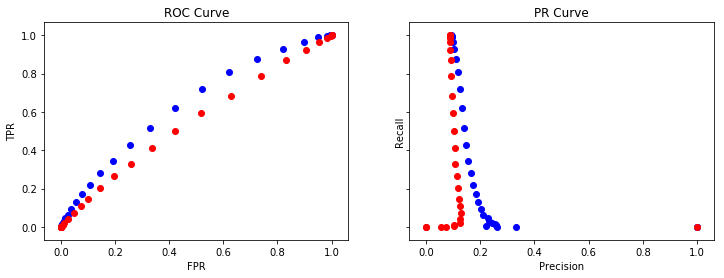

In [9]:
fit_times = []; eval_times = []; acc_scores = []; rocauc_scores = []; prauc_scores = []

for k in ks:
    print('----- k = %d -----' % k)
    clf = neighbors.KNeighborsClassifier(n_jobs=n_jobs, p=1, n_neighbors=k)
    fit_time = utils.train_model(clf, X_train, y_train)
    acc_score, rocauc_score, prauc_score, eval_time = utils.evaluate(clf, X_train, y_train, X_valid, y_valid)
    fit_times.append(fit_time); eval_times.append(eval_time)
    acc_scores.append(acc_score); rocauc_scores.append(rocauc_score); prauc_scores.append(prauc_score)

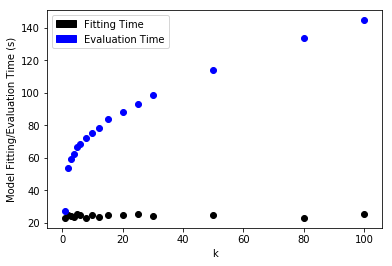

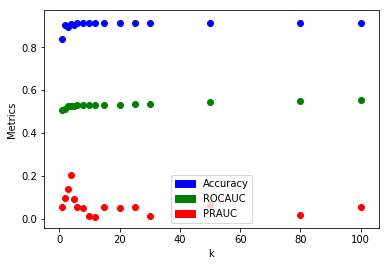

    0_k  1_Accuracy  2_ROCAUC   3_PRAUC  4_fit_time  5_eval_time
0     1    0.838540  0.508377  0.056324   23.184678    27.108853
1     2    0.904859  0.513801  0.096415   24.647840    53.771541
2     3    0.892676  0.525093  0.140271   23.860317    59.043813
3     4    0.909362  0.525536  0.205810   23.432648    62.583278
4     5    0.904764  0.525993  0.094834   25.125507    66.390642
5     6    0.910879  0.531890  0.054751   24.868518    68.422037
6     8    0.911306  0.531444  0.050060   23.060092    72.055745
7    10    0.911780  0.529555  0.015403   24.547993    75.500865
8    12    0.911827  0.533147  0.011240   23.330608    78.608544
9    15    0.911780  0.528590  0.055284   24.687396    84.046234
10   20    0.911827  0.530583  0.052982   24.777293    88.377562
11   25    0.911827  0.534214  0.054739   25.076793    93.281836
12   30    0.911827  0.535429  0.015246   23.842107    98.832837
13   50    0.911827  0.544805  0.063518   24.910141   114.246988
14   80    0.911827  0.54

In [10]:
utils.plot_metrics(ks, 'k', False, fit_times, eval_times, acc_scores, rocauc_scores, prauc_scores)

The increase in evaluation time has the same trend as that of L2, but the best ROCAUC is 0.552, slightly better than that of L2.

## Normalized Data

To see the sensitivity to the magnitude of data values, I will also try the normalized data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105471 entries, 0 to 105470
Columns: 1789 entries, f3 to loss
dtypes: float64(1789)
memory usage: 1.4 GB
Time elapsed (Training): 30.9064 s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=5, p=2,
           weights='uniform')
Accuracy (Training): 0.909038
ROCAUC Score (Training): 0.883422
PRAUC Score (Training): 0.179765
Accuracy (Validation): 0.905854
ROCAUC Score (Validation): 0.552175
PRAUC Score (Validation): 0.028920
Time elapsed (Evaluation): 11911.3964 s


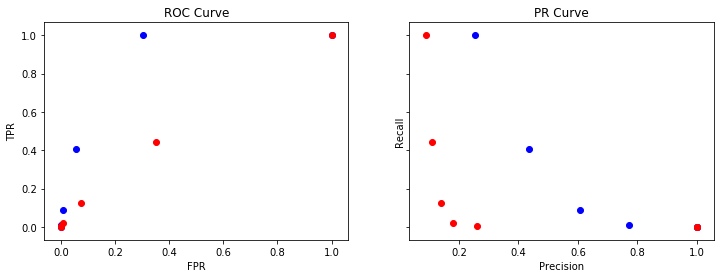

In [11]:
# Load the training data (imputed and normalized) from the CSV file
df, X, y = utils.load_csv('train_v2_preprocessed_normalized.csv')

# Separate training and validation sets
X_train, y_train, X_valid, y_valid = utils.split_data(kf, X, y)

# Train the model and evaluate
clf = neighbors.KNeighborsClassifier(n_jobs=n_jobs)
fit_time = utils.train_model(clf, X_train, y_train)

acc_score, rocauc_score, prauc_score, eval_time = utils.evaluate(clf, X_train, y_train, X_valid, y_valid)

In [12]:
ks = [1, 2, 3, 4, 5, 6, 8, 10, 12, 15, 20, 25, 30, 50, 80, 100]

----- k = 1 -----
Time elapsed (Training): 29.8427 s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=1, p=2,
           weights='uniform')
Accuracy (Training): 1.000000
ROCAUC Score (Training): 1.000000
PRAUC Score (Training): 0.000000
Accuracy (Validation): 0.844039
ROCAUC Score (Validation): 0.516006
PRAUC Score (Validation): 0.068213
Time elapsed (Evaluation): 2561.3462 s


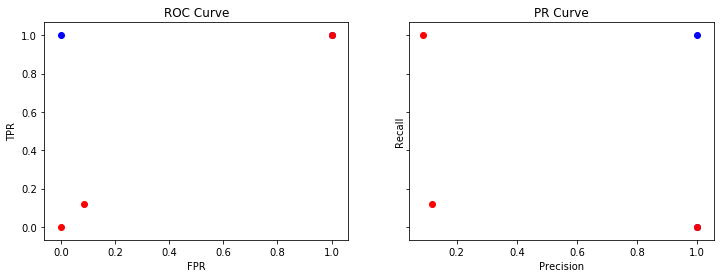

----- k = 2 -----
Time elapsed (Training): 28.7798 s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=2, p=2,
           weights='uniform')
Accuracy (Training): 0.918117
ROCAUC Score (Training): 0.960136
PRAUC Score (Training): 0.234359
Accuracy (Validation): 0.904432
ROCAUC Score (Validation): 0.525908
PRAUC Score (Validation): 0.023038
Time elapsed (Evaluation): 9642.9334 s


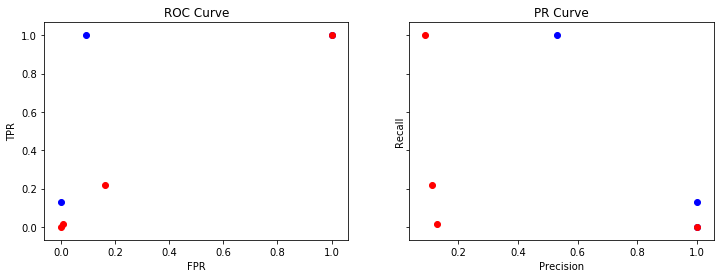

----- k = 3 -----
Time elapsed (Training): 29.3366 s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=3, p=2,
           weights='uniform')
Accuracy (Training): 0.918069
ROCAUC Score (Training): 0.929699
PRAUC Score (Training): 0.225804
Accuracy (Validation): 0.892629
ROCAUC Score (Validation): 0.537882
PRAUC Score (Validation): 0.039413
Time elapsed (Evaluation): 9816.0564 s


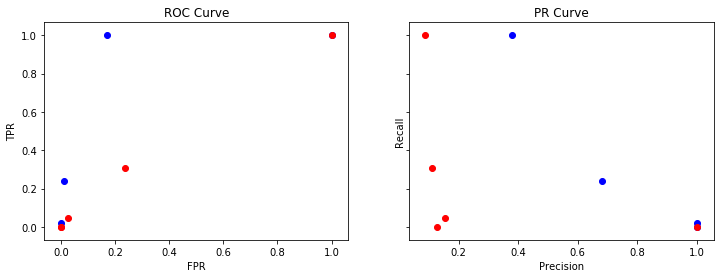

----- k = 4 -----
Time elapsed (Training): 30.8118 s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=4, p=2,
           weights='uniform')
Accuracy (Training): 0.909287
ROCAUC Score (Training): 0.904445
PRAUC Score (Training): 0.195790
Accuracy (Validation): 0.908746
ROCAUC Score (Validation): 0.544948
PRAUC Score (Validation): 0.025787
Time elapsed (Evaluation): 9928.3178 s


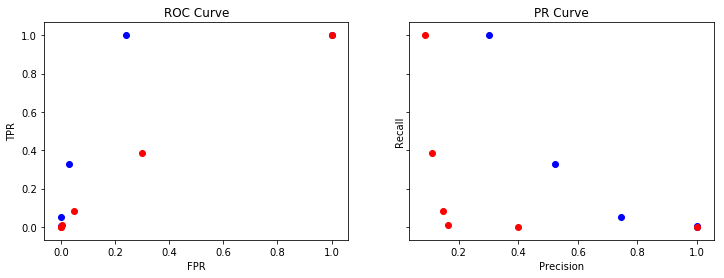

----- k = 5 -----
Time elapsed (Training): 28.6007 s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=5, p=2,
           weights='uniform')
Accuracy (Training): 0.909038
ROCAUC Score (Training): 0.883422
PRAUC Score (Training): 0.179765
Accuracy (Validation): 0.905854
ROCAUC Score (Validation): 0.552175
PRAUC Score (Validation): 0.028920
Time elapsed (Evaluation): 9993.3340 s


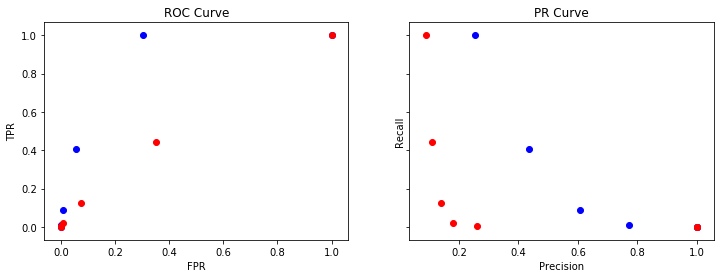

----- k = 6 -----
Time elapsed (Training): 29.8687 s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=6, p=2,
           weights='uniform')
Accuracy (Training): 0.906869
ROCAUC Score (Training): 0.866039
PRAUC Score (Training): 0.166119
Accuracy (Validation): 0.910690
ROCAUC Score (Validation): 0.558664
PRAUC Score (Validation): 0.030686
Time elapsed (Evaluation): 10124.3861 s


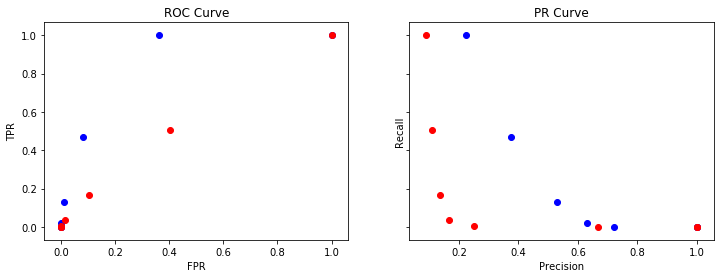

----- k = 8 -----
Time elapsed (Training): 29.4863 s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=8, p=2,
           weights='uniform')
Accuracy (Training): 0.906158
ROCAUC Score (Training): 0.837768
PRAUC Score (Training): 0.146437
Accuracy (Validation): 0.911164
ROCAUC Score (Validation): 0.572253
PRAUC Score (Validation): 0.030260
Time elapsed (Evaluation): 10083.6834 s


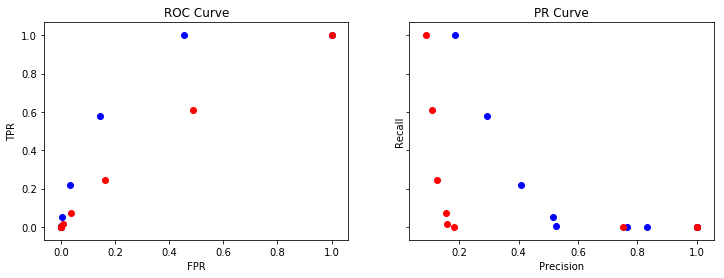

----- k = 10 -----
Time elapsed (Training): 32.1848 s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=10, p=2,
           weights='uniform')
Accuracy (Training): 0.906241
ROCAUC Score (Training): 0.817047
PRAUC Score (Training): 0.138991
Accuracy (Validation): 0.911496
ROCAUC Score (Validation): 0.588035
PRAUC Score (Validation): 0.032232
Time elapsed (Evaluation): 10320.7421 s


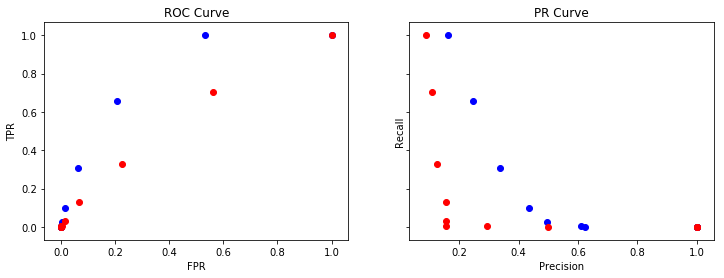

----- k = 12 -----
Time elapsed (Training): 44.2196 s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=12, p=2,
           weights='uniform')
Accuracy (Training): 0.906182
ROCAUC Score (Training): 0.801412
PRAUC Score (Training): 0.132423
Accuracy (Validation): 0.911590
ROCAUC Score (Validation): 0.594643
PRAUC Score (Validation): 0.035235
Time elapsed (Evaluation): 10214.1687 s


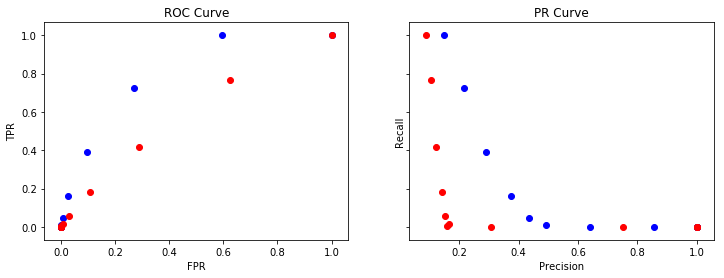

----- k = 15 -----
Time elapsed (Training): 29.4934 s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=15, p=2,
           weights='uniform')
Accuracy (Training): 0.906170
ROCAUC Score (Training): 0.783123
PRAUC Score (Training): 0.125271
Accuracy (Validation): 0.911780
ROCAUC Score (Validation): 0.600654
PRAUC Score (Validation): 0.039644
Time elapsed (Evaluation): 10219.1710 s


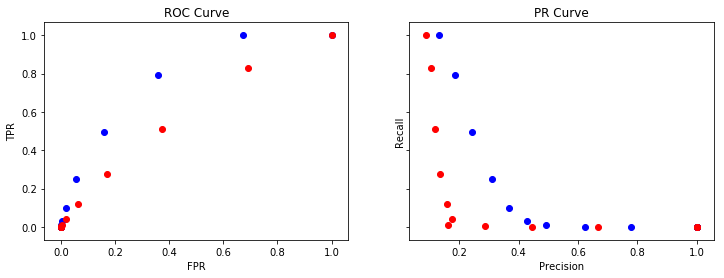

----- k = 20 -----
Time elapsed (Training): 28.2288 s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=20, p=2,
           weights='uniform')
Accuracy (Training): 0.906146
ROCAUC Score (Training): 0.762347
PRAUC Score (Training): 0.114501
Accuracy (Validation): 0.912017
ROCAUC Score (Validation): 0.607756
PRAUC Score (Validation): 0.040775
Time elapsed (Evaluation): 41007.3738 s


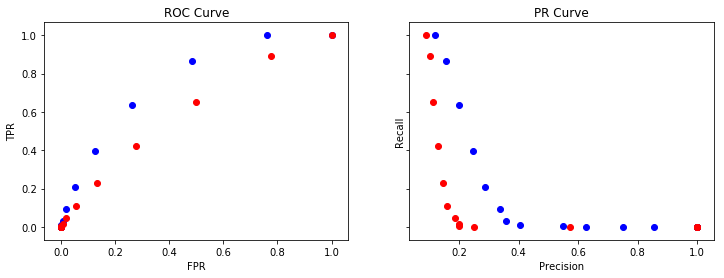

----- k = 25 -----
Time elapsed (Training): 29.0489 s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=25, p=2,
           weights='uniform')
Accuracy (Training): 0.906158
ROCAUC Score (Training): 0.747984
PRAUC Score (Training): 0.107881
Accuracy (Validation): 0.911970
ROCAUC Score (Validation): 0.611965
PRAUC Score (Validation): 0.042635
Time elapsed (Evaluation): 10498.9048 s


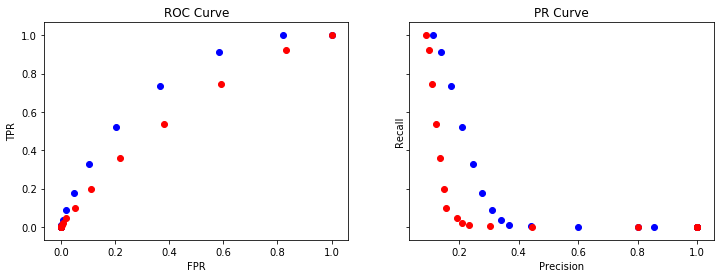

----- k = 30 -----
Time elapsed (Training): 29.8598 s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=30, p=2,
           weights='uniform')
Accuracy (Training): 0.906158
ROCAUC Score (Training): 0.737635
PRAUC Score (Training): 0.103364
Accuracy (Validation): 0.911922
ROCAUC Score (Validation): 0.618038
PRAUC Score (Validation): 0.044756
Time elapsed (Evaluation): 10681.7757 s


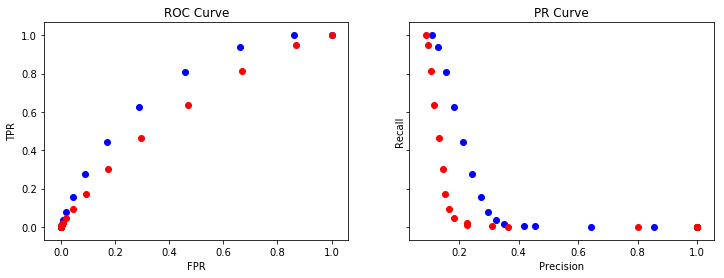

----- k = 50 -----
Time elapsed (Training): 32.7559 s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=50, p=2,
           weights='uniform')
Accuracy (Training): 0.906170
ROCAUC Score (Training): 0.715498
PRAUC Score (Training): 0.093992
Accuracy (Validation): 0.911875
ROCAUC Score (Validation): 0.628525
PRAUC Score (Validation): 0.048287
Time elapsed (Evaluation): 10792.0917 s


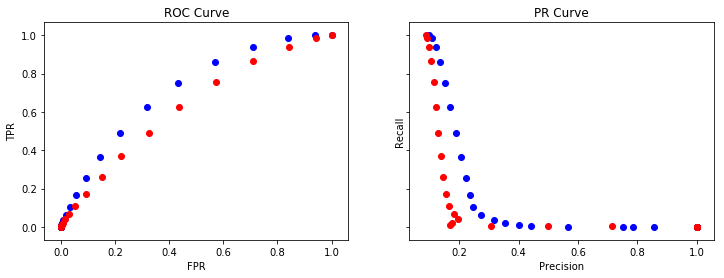

----- k = 80 -----
Time elapsed (Training): 29.2494 s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=80, p=2,
           weights='uniform')
Accuracy (Training): 0.906158
ROCAUC Score (Training): 0.700732
PRAUC Score (Training): 0.084913
Accuracy (Validation): 0.911827
ROCAUC Score (Validation): 0.637615
PRAUC Score (Validation): 0.047240
Time elapsed (Evaluation): 10525.0978 s


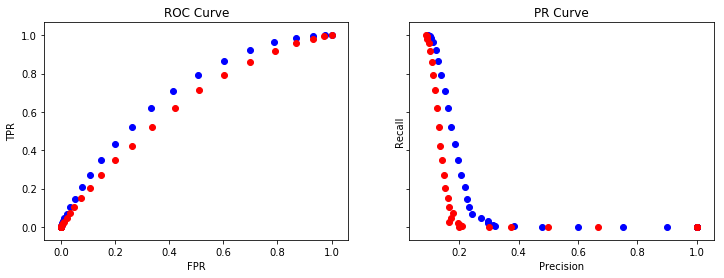

----- k = 100 -----
Time elapsed (Training): 30.4694 s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=100, p=2,
           weights='uniform')
Accuracy (Training): 0.906146
ROCAUC Score (Training): 0.695057
PRAUC Score (Training): 0.081344
Accuracy (Validation): 0.911827
ROCAUC Score (Validation): 0.641021
PRAUC Score (Validation): 0.044615
Time elapsed (Evaluation): 10616.7110 s


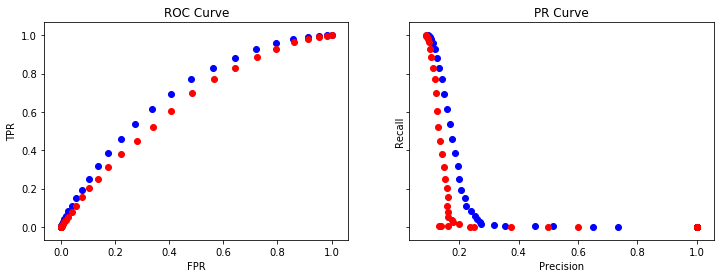

In [13]:
fit_times = []; eval_times = []; acc_scores = []; rocauc_scores = []; prauc_scores = []

for k in ks:
    print('----- k = %d -----' % k)
    clf = neighbors.KNeighborsClassifier(n_jobs=n_jobs, n_neighbors=k)
    fit_time = utils.train_model(clf, X_train, y_train)
    acc_score, rocauc_score, prauc_score, eval_time = utils.evaluate(clf, X_train, y_train, X_valid, y_valid)
    fit_times.append(fit_time); eval_times.append(eval_time)
    acc_scores.append(acc_score); rocauc_scores.append(rocauc_score); prauc_scores.append(prauc_score)

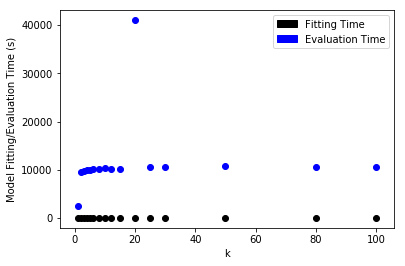

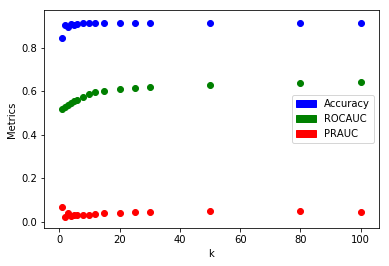

    0_k  1_Accuracy  2_ROCAUC   3_PRAUC  4_fit_time   5_eval_time
0     1    0.844039  0.516006  0.068213   29.842651   2561.346150
1     2    0.904432  0.525908  0.023038   28.779840   9642.933363
2     3    0.892629  0.537882  0.039413   29.336595   9816.056378
3     4    0.908746  0.544948  0.025787   30.811786   9928.317808
4     5    0.905854  0.552175  0.028920   28.600673   9993.334008
5     6    0.910690  0.558664  0.030686   29.868719  10124.386137
6     8    0.911164  0.572253  0.030260   29.486337  10083.683413
7    10    0.911496  0.588035  0.032232   32.184838  10320.742056
8    12    0.911590  0.594643  0.035235   44.219593  10214.168656
9    15    0.911780  0.600654  0.039644   29.493382  10219.171034
10   20    0.912017  0.607756  0.040775   28.228778  41007.373838
11   25    0.911970  0.611965  0.042635   29.048907  10498.904761
12   30    0.911922  0.618038  0.044756   29.859769  10681.775707
13   50    0.911875  0.628525  0.048287   32.755900  10792.091652
14   80   

In [14]:
utils.plot_metrics(ks, 'k', False, fit_times, eval_times, acc_scores, rocauc_scores, prauc_scores)

----- k = 1 -----
Time elapsed (Training): 28.4905 s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=1, p=1,
           weights='uniform')
Accuracy (Training): 1.000000
ROCAUC Score (Training): 1.000000
PRAUC Score (Training): 0.000000
Accuracy (Validation): 0.844608
ROCAUC Score (Validation): 0.513647
PRAUC Score (Validation): 0.063604
Time elapsed (Evaluation): 2354.3587 s


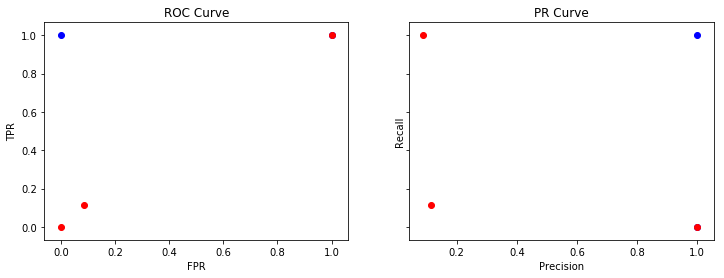

----- k = 2 -----
Time elapsed (Training): 29.3735 s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=2, p=1,
           weights='uniform')
Accuracy (Training): 0.918081
ROCAUC Score (Training): 0.961665
PRAUC Score (Training): 0.229443
Accuracy (Validation): 0.905001
ROCAUC Score (Validation): 0.526221
PRAUC Score (Validation): 0.026004
Time elapsed (Evaluation): 8887.5329 s


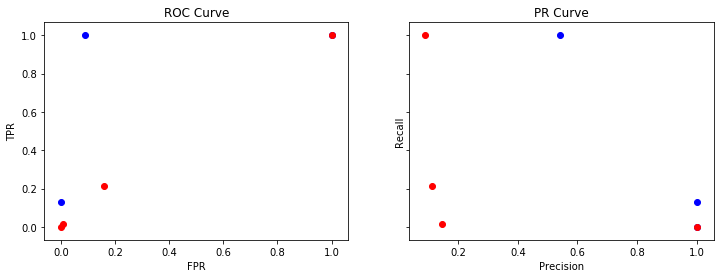

----- k = 3 -----
Time elapsed (Training): 28.9242 s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=3, p=1,
           weights='uniform')
Accuracy (Training): 0.919799
ROCAUC Score (Training): 0.930910
PRAUC Score (Training): 0.240451
Accuracy (Validation): 0.891965
ROCAUC Score (Validation): 0.532272
PRAUC Score (Validation): 0.032682
Time elapsed (Evaluation): 8993.7834 s


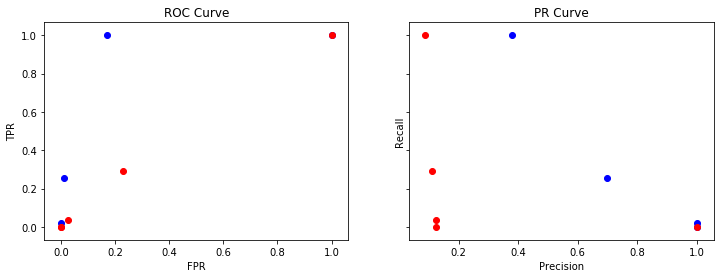

----- k = 4 -----
Time elapsed (Training): 29.1675 s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=4, p=1,
           weights='uniform')
Accuracy (Training): 0.909429
ROCAUC Score (Training): 0.904725
PRAUC Score (Training): 0.207517
Accuracy (Validation): 0.909315
ROCAUC Score (Validation): 0.539309
PRAUC Score (Validation): 0.067267
Time elapsed (Evaluation): 9056.1387 s


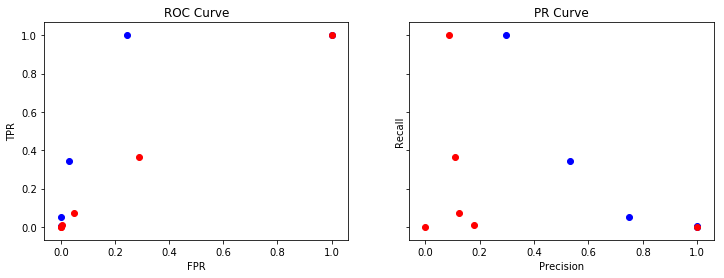

----- k = 5 -----
Time elapsed (Training): 29.0808 s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=5, p=1,
           weights='uniform')
Accuracy (Training): 0.909346
ROCAUC Score (Training): 0.883647
PRAUC Score (Training): 0.186640
Accuracy (Validation): 0.906566
ROCAUC Score (Validation): 0.552440
PRAUC Score (Validation): 0.026261
Time elapsed (Evaluation): 9893.8802 s


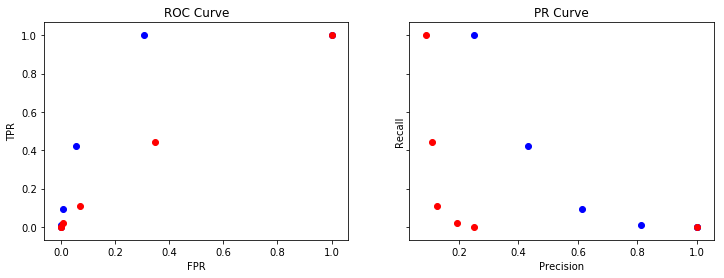

----- k = 6 -----
Time elapsed (Training): 29.1867 s
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=6, p=1,
           weights='uniform')


In [ ]:
fit_times = []; eval_times = []; acc_scores = []; rocauc_scores = []; prauc_scores = []

for k in ks:
    print('----- k = %d -----' % k)
    clf = neighbors.KNeighborsClassifier(n_jobs=n_jobs, p=1, n_neighbors=k)
    fit_time = utils.train_model(clf, X_train, y_train)
    acc_score, rocauc_score, prauc_score, eval_time = utils.evaluate(clf, X_train, y_train, X_valid, y_valid)
    fit_times.append(fit_time); eval_times.append(eval_time)
    acc_scores.append(acc_score); rocauc_scores.append(rocauc_score); prauc_scores.append(prauc_score)

In [ ]:
utils.plot_metrics(ks, 'k', False, fit_times, eval_times, acc_scores, rocauc_scores, prauc_scores)

The normalized data took much longer to run. From what I have finished running, however, it seems like the nearest neighbor classifiers improved a bit on the normalized data, reaching a ROCAUC of 0.608 on the validation set with k=20. It is still not impressive compared to other classifiers I've tried so far.